262 312
((array([[[ 50, 247]],

       [[ 49, 248]],

       [[ 46, 248]],

       [[ 45, 249]],

       [[ 44, 249]],

       [[ 40, 253]],

       [[ 40, 254]],

       [[ 39, 255]],

       [[ 39, 258]],

       [[ 40, 259]],

       [[ 48, 259]],

       [[ 49, 258]],

       [[ 56, 258]],

       [[ 57, 259]],

       [[ 61, 259]],

       [[ 62, 260]],

       [[ 62, 261]],

       [[ 62, 260]],

       [[ 63, 259]],

       [[ 65, 259]],

       [[ 66, 258]],

       [[ 66, 257]],

       [[ 65, 256]],

       [[ 65, 254]],

       [[ 60, 249]],

       [[ 59, 249]],

       [[ 58, 248]],

       [[ 56, 248]],

       [[ 55, 247]]], dtype=int32), array([[[ 29, 197]],

       [[ 28, 198]],

       [[ 25, 198]],

       [[ 24, 199]],

       [[ 23, 199]],

       [[ 18, 204]],

       [[ 18, 205]],

       [[ 17, 206]],

       [[ 17, 208]],

       [[ 16, 209]],

       [[ 16, 212]],

       [[ 17, 213]],

       [[ 17, 217]],

       [[ 15, 219]],

       [[ 14, 219]],

       [

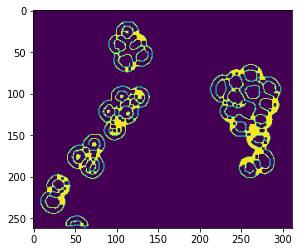

In [14]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load the image
image_orig = cv2.imread("RedBloodCells.jpg")
height_orig, width_orig = image_orig.shape[:2]
 
print(height_orig, width_orig)

# copy of original image
image_to_process = image_orig.copy()

lower = np.array([26,26,26])
upper = np.array([115,115,115])

# find the colors within the specified boundaries
image_mask = cv2.inRange(image_to_process, lower, upper)

# apply the mask
image_res = cv2.bitwise_and(image_to_process, image_to_process, mask = image_mask)

image_gray = cv2.cvtColor(image_res, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)

image_edged = cv2.Canny(image_gray, 50, 100)
image_edged = cv2.dilate(image_edged, None, iterations=1)
image_edged = cv2.erode(image_edged, None, iterations=1)

contours = cv2.findContours(image_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]

cv2.imwrite("output.jpg",image_edged)
img = mpimg.imread('output.jpg')
imgplot = plt.imshow(img)
plt.show()